In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data generation for classification problem i.e Logistic Regression


In [2]:
mean1=np.array([1,1])
cov1=np.array([[1,0.1],[0.1,1]])


mean2=np.array([4,5])
cov2=np.array([[1,0.2],[0.2,1.2]])


In [3]:
dist1=np.random.multivariate_normal(mean1,cov1,500)
dist2=np.random.multivariate_normal(mean2,cov2,500)

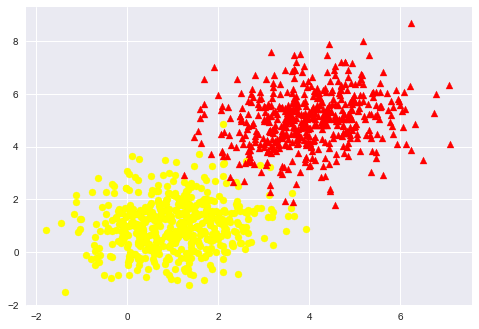

In [4]:
plt.style.use("seaborn")
plt.scatter(dist1[:,0],dist1[:,1],color="yellow")
plt.scatter(dist2[:,0],dist2[:,1],color="red",marker="^")
plt.show()

## making training and test data 

In [5]:
data=np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [6]:
data[:500,:2]=dist1
data[500:,:2]=dist2
data[500:,-1]=1.0




In [7]:
np.random.shuffle(data)

In [8]:
data[:10,:]

array([[ 1.43385447,  1.24836767,  0.        ],
       [ 1.11053601,  0.57057523,  0.        ],
       [ 3.75420832,  5.26987607,  1.        ],
       [ 1.2309526 ,  0.90228044,  0.        ],
       [ 1.10555799, -0.39313874,  0.        ],
       [ 3.69836855,  5.64701802,  1.        ],
       [ 0.86125949,  1.83812917,  0.        ],
       [ 4.5621039 ,  5.59789115,  1.        ],
       [ 0.18879764,  0.94986726,  0.        ],
       [ 3.94850026,  5.03104255,  1.        ]])

In [9]:
X=data[:,:2]
Y=data[:,-1]
print(X[:10,])
Y[:10,]

[[ 1.43385447  1.24836767]
 [ 1.11053601  0.57057523]
 [ 3.75420832  5.26987607]
 [ 1.2309526   0.90228044]
 [ 1.10555799 -0.39313874]
 [ 3.69836855  5.64701802]
 [ 0.86125949  1.83812917]
 [ 4.5621039   5.59789115]
 [ 0.18879764  0.94986726]
 [ 3.94850026  5.03104255]]


array([0., 0., 1., 0., 0., 1., 0., 1., 0., 1.])

## Splitting the shuffled data into training set and test set

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [12]:
print(X_train.shape)
print(Y_train.shape)

(800, 2)
(800,)


In [71]:
def hypothesis(X,theta):
    h=np.dot(X,theta)
    return sigmoid(h)

def sigmoid(h):
    return 1.0/(1.0+np.exp(-1.0*h))

def gradient(X,Y,theta):
    
    grad=np.zeros((X.shape[1],1))
    m=X.shape[0]
    n=X.shape[1]
    
    
    for i in range(m):
        hx=hypothesis(X[i],theta)
        for j in range(n):
            grad[j] += (Y[i]-hx)*X[i,j]
            
#     print(grad/m)
    return grad/m

def gradient_descent(X,Y,lr=0.2):
    ones=np.ones((X.shape[0],1))
    X_=np.hstack((ones,X))
    m=X_.shape[1]
    itr=0
    max_itr=1000
    
#     print(m)
    theta=np.zeros((m,1))
    
    while(itr<=max_itr):
        grad=gradient(X_,Y,theta)
        for j in range(m):
            theta[j] =theta[j]+lr*grad[j]
        itr +=1
        
    return theta
        
def predict(X,theta):
    confidence =hypothesis(X,theta)
    
    if confidence >=0.5:
        return 1
    else:
        return 0
        
def accuracy(X,Y,theta):
    y_pred=[]
    ones=np.ones((X.shape[0],1))
    X_=np.hstack((ones,X))
    
    for i in range(Y.shape[0]):
        p=predict(X_[i],theta)
        y_pred.append(p)
        
    y_pred=np.array(y_pred)
    
    
    return float ((y_pred==Y).sum())/(Y.shape[0])
    
    
    
    

In [44]:
theta=gradient_descent(X_train,Y_train)

In [45]:
theta

array([[-4.36909867],
       [ 0.64338429],
       [ 1.09191312]])

In [46]:
x = np.linspace(-4,8,10)
y = -(theta[1]*x + theta[0])/theta[2]


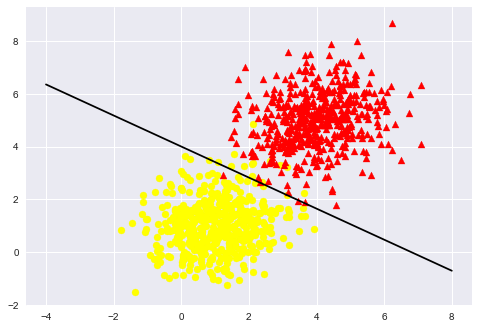

In [50]:
plt.style.use("seaborn")
plt.scatter(dist1[:,0],dist1[:,1],color="yellow")
plt.scatter(dist2[:,0],dist2[:,1],color="red",marker="^")
plt.plot(x,y,color="black")
plt.show()

In [72]:
ans=accuracy(X_test,Y_test,theta)

In [73]:
print(ans)

0.985
